In [9]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataset = pd.read_csv('cpts_yield.csv')
dataset = dataset.dropna()
cot_rend = dataset.iloc[:, [3,4]].values
dataset.head(60)

,rendimento_real,data_pagamento,data_base,cotacao,rendimento_percentual
0,1.01,20/04/2021,13/04/2021,103.40,0.977
1,1.05,17/03/2021,10/03/2021,100.07,1.049
2,1.05,19/02/2021,10/02/2021,103.19,1.018
3,1.00,20/01/2021,13/01/2021,103.17,0.969
4,1.05,17/12/2020,10/12/2020,97.74,1.074
5,0.90,17/11/2020,10/11/2020,98.49,0.914
6,0.72,20/10/2020,13/10/2020,99.89,0.721
7,0.75,18/09/2020,11/09/2020,96.34,0.778
8,0.72,19/08/2020,12/08/2020,96.30,0.748
9,0.67,21/07/2020,14/07/2020,103.12,0.650


In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
cot_rend = sc.fit_transform(cot_rend)
cot_rend

array([[0.48656716, 0.59122085],
       [0.3445629 , 0.68998628],
       [0.47761194, 0.64746228],
       [0.47675906, 0.58024691],
       [0.24520256, 0.72427984],
       [0.2771855 , 0.5048011 ],
       [0.33688699, 0.24005487],
       [0.18550107, 0.31824417],
       [0.18379531, 0.27709191],
       [0.47462687, 0.14266118],
       [0.1326226 , 0.18792867],
       [0.17867804, 0.17832647],
       [0.        , 0.22085048],
       [0.67206823, 0.0781893 ],
       [1.        , 0.        ],
       [0.66140725, 0.08093278],
       [0.62515991, 0.08641975],
       [0.59744136, 0.1563786 ],
       [0.38422175, 0.2702332 ],
       [0.8533049 , 0.17009602],
       [0.56289979, 0.29492455],
       [0.32537313, 0.28395062],
       [0.36289979, 0.1659808 ],
       [0.38422175, 0.13443073],
       [0.38848614, 0.13305898],
       [0.45927505, 0.11934156],
       [0.43539446, 0.79423868],
       [0.42302772, 0.32784636],
       [0.47334755, 0.31550069],
       [0.33773987, 0.3223594 ],
       [0.

In [21]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 2, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(cot_rend)
som.train_random(data = cot_rend, num_iteration = 100)

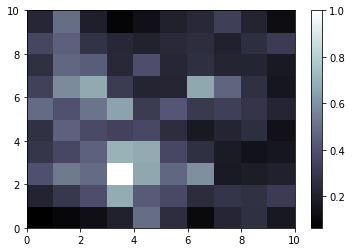

In [22]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()